In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def getMean(pixelMap, threshold, img_size):
    bg_weight = sum(pixelMap[0 : threshold + 1]) / (img_size[0] * img_size[1])
    fg_weight = 1 - bg_weight

    bg_mean, fg_mean = 0, 0
    for i in range(len(pixelMap)):
        if i <= threshold:
            bg_mean = bg_mean + (i * pixelMap[i])
        else:
            fg_mean = fg_mean + (i * pixelMap[i])

    if bg_weight != 0: 
        bg_mean = bg_mean / bg_weight
    if fg_weight != 0:
        fg_mean = fg_mean / fg_weight

    return (bg_weight, bg_mean, fg_weight, fg_mean)


def getPixelMap(arr):
    map = [0]*256
    for e in arr:
        map[e] = map[e] + 1

    return map

In [3]:
def getThreshold(image):
    max_threshold, max_variance = -1, -1
    pixel = np.array(image).flatten()
    pixelMap = getPixelMap(pixel)

    for threshold in range(256):
        bg_weight, bg_mean, fg_weight, fg_mean = getMean(pixelMap, threshold, image.size)
        global_mean = bg_weight * bg_mean + fg_weight * fg_mean
        variance = bg_weight * ((bg_mean - global_mean) ** 2) + fg_weight * ((fg_mean - global_mean) ** 2)

        if variance > max_variance:
            max_variance = variance
            max_threshold = threshold

    return max_threshold

# Otsu Method

Maximizes the intra-class variance to obtain a globally optimum threshold

## The Mean Intensity is calculated as:

![](otsu-mean.png)

## The Intra-Class Variance:

![](otsu-global-mean.png)

## Final Step:

![](otsu.png)

Thresold obtained using otsu method:  146


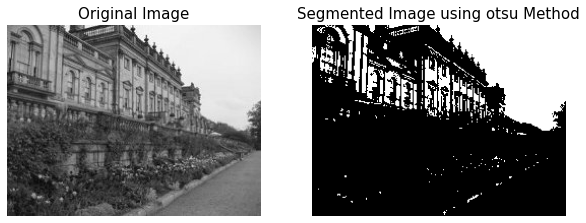

In [4]:
image = Image.open('org.jpg')
threshold = getThreshold(image)
print("Thresold obtained using otsu method: ", threshold)
image_copy = image.copy()
pixel = image_copy.load()
height, width = image_copy.size

for i in range(height):
    for j in range(width):
        if pixel[i, j] > threshold:
            pixel[i, j] = 255
        else:
            pixel[i, j] = 0

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Original Image', size=15)
plt.imshow(image, 'gray')
plt.subplot(1, 2, 2)
plt.title('Segmented Image using otsu Method', size=15)
plt.axis('off')
plt.imshow(image_copy, 'gray')